# Validation report for dmu26_XID+SPIRE_COSMOS_20161129

The data product dmu26_XID+SPIRE_COSMOS_20161129, contains four files:

1. dmu26_XID+SPIRE_COSMOS_20161129.fits: The catalogue file
2. dmu26_Bayes_pval_psw_submm_20161129.fits: The Bayesian pvalue map for 250
3. dmu26_Bayes_pval_pmw_submm_20161129.fits: The Bayesian pvalue map for 350
4. dmu26_Bayes_pval_plw_submm_20161129.fits: The Bayesian pvalue map for 500

## Catalogue Validation
Validation of the catalogue should cover the following as a minimum:

* Compare XID+ Fluxes with previous catalogues
* Check for sources with poor convergence (i.e. $\hat{R}$ >1.2 and $n_{eff}$ <40)
* Check for sources with strange error (i.e. small upper limit and large lower limit, which would be indicating prior is limiting flux)
* Check for sources that return prior (i.e. probably very large flux and large error)
* Check background estimate is similar across neighbouring tiles (will vary depending on depth of prior list)



In [1]:
from astropy.table import Table
import numpy as np
import pylab as plt
%matplotlib inline

In [2]:
table=Table.read('/Users/williamp/validation/cosmos/SPIRE/dmu26_XID+SPIRE_COSMOS_20161129.fits', format='fits')

In [3]:
#table[:10].show_in_notebook()

In [4]:
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


### Comparison to previous catalogues
Suggest using COSMOS2015 catalogue and preexisiting Le'Floch 2009 fluxes as comparison. (can get table from HeDAM VO server)

In [5]:
table.sort('help_id')

COSMOS2015 = Table.read('/Users/williamp/validation/cosmos/SPIRE/COSMOS2015_Laigle+v1.1_wHELPids_PSW.fits')
COSMOS2015.sort('help_id')

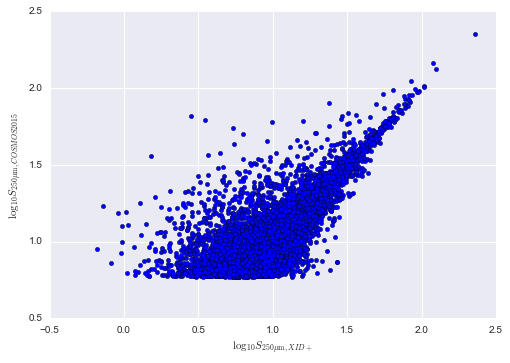

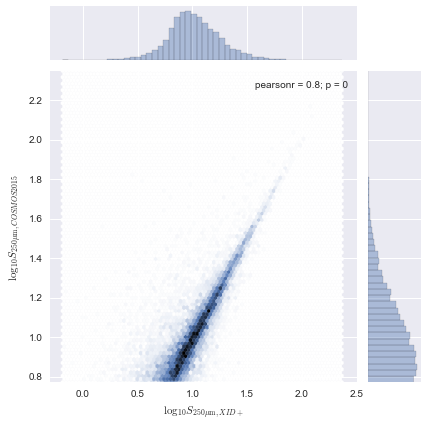

In [6]:
plt.scatter(np.log10(COSMOS2015['F_SPIRE_250']), np.log10(COSMOS2015['FLUX_250']))
plt.xlabel('$\log_{10}S_{250 \mathrm{\mu m}, XID+}$')
plt.ylabel('$\log_{10}S_{250 \mathrm{\mu m}, COSMOS2015}$')
plt.show()

plot=sns.jointplot(x=np.log10(COSMOS2015['F_SPIRE_250']), y=np.log10(COSMOS2015['FLUX_250']), xlim=(-0.3,2.5), kind='hex')
plot.set_axis_labels('$\log_{10}S_{250 \mathrm{\mu m}, XID+}$', '$\log_{10}S_{250 \mathrm{\mu m}, COSMOS2015}$')
plt.show()

The agreement is reasonably good. As would be expected, the lower flux density objects are typically given a lower flux density by XID+ than in the catalogue due to the higher source density resulting in greater deblending effects. At the bright end, the two catalogues more or less converge.

### Convergence Statistics
e.g. How many of the objects satisfy critera? 
(note Some of the $\hat{R}$ values are NaN. This is a PyStan bug. They are most likely 1.0

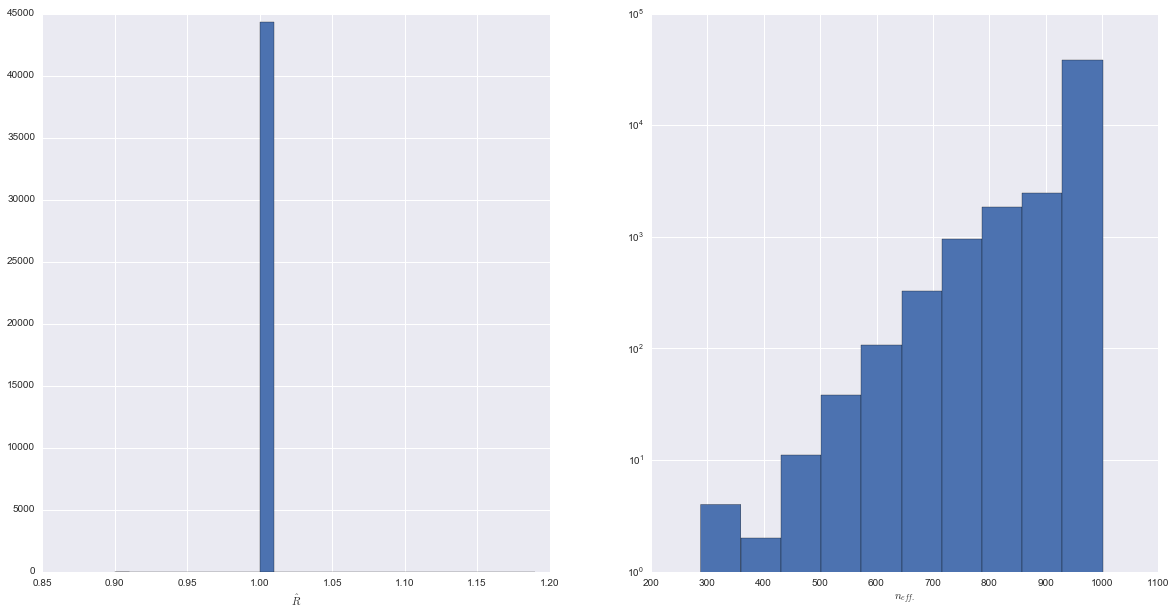

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
Rhat=plt.hist(np.isfinite(table['Rhat_SPIRE_250']), bins=np.arange(0.9,1.2,0.01))
plt.xlabel(r'$\hat{R}$')
plt.subplot(1,2,2)
neff=plt.hist(table['n_eff_SPIRE_250'])
plt.yscale('log')
plt.xlabel(r'$n_{eff.}$')

In [8]:
numRhat = 0
numNeff = 0

for i in range(0, len(table)):
    if table['Rhat_SPIRE_250'][i] > 1.2 and np.isfinite(table['Rhat_SPIRE_250']):
        numRhat += 1
    if table['n_eff_SPIRE_250'][i] < 40:
        numNeff += 1
        
print(str(numRhat)+' objects have $\hat{R}$ > 1.2')
print(str(numNeff)+' objects have n$_{eff}$ < 40')

0 objects have $\hat{R}$ > 1.2
0 objects have n$_{eff}$ < 40


All objects have good $\hat{R}$ and n$_{eff}$ values

### Skewness

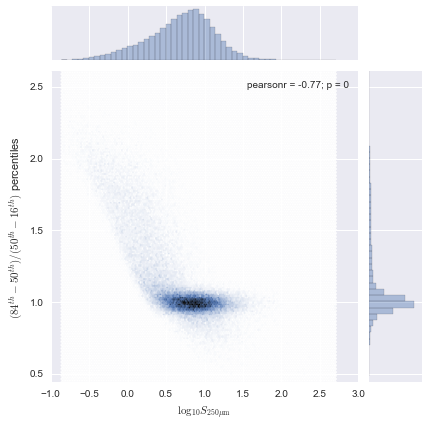

In [9]:
FLUX_24 = np.log10(table['F_SPIRE_250'])
ERR_ratio = (table['FErr_SPIRE_250_u']-table['F_SPIRE_250'])/(table['F_SPIRE_250']-table['FErr_SPIRE_250_l'])
plot=sns.jointplot(x=FLUX_24, y=ERR_ratio, xlim=(-1,3), kind='hex')
plot.set_axis_labels(r'$\log_{10}S_{250 \mathrm{\mu m}}$ ', r'$(84^{th}-50^{th})/(50^{th}-16^{th})$ percentiles')


### Sources where posterior=prior
Suggest looking at size of errors to diagnose. How many appear to be returning prior? Where are they on Bayesian P value map? Does it make sense why?

None appear to have large lower errors and small upper errors. Objects below ~3 $\mu$Jy are perhaps limited at the lower flux end. This makes sense as these objects are faint are also likely to be uncertain but the lower flux limit cuts the size of the lower error - Will

#Looking at the high flux objects
Looking at the errors on the high flux objects to see if they are prior limited.

In [10]:
'''bRA = []
bDec = []
bF_MIPS_24 = []
bFErr_MIPS_24_u = []
bFErr_MIPS_24_l = []
for i in range(0, len(table)):
    if table['F_SPIRE_250'][i] > 1e5:
        bRA.append(table['RA'][i])
        bDec.append(table['Dec'][i])
        bF_MIPS_24.append(table['F_SPIRE_250'][i])
        bFErr_MIPS_24_u.append(table['FErr_SPIRE_250_u'][i])
        bFErr_MIPS_24_l.append(table['FErr_SPIRE_250_l'][i])
        
bFErr_MIPS_24 = []
for i in range(0, len(bF_MIPS_24)):
    if bF_MIPS_24[i] - bFErr_MIPS_24_l[i] > bFErr_MIPS_24_u[i] - bF_MIPS_24[i]:
        bFErr_MIPS_24.append(bF_MIPS_24[i] - bFErr_MIPS_24_l[i])
    else:
        bFErr_MIPS_24.append(bFErr_MIPS_24_u[i] - bF_MIPS_24[i])'''

"bRA = []\nbDec = []\nbF_MIPS_24 = []\nbFErr_MIPS_24_u = []\nbFErr_MIPS_24_l = []\nfor i in range(0, len(table)):\n    if table['F_SPIRE_250'][i] > 1e5:\n        bRA.append(table['RA'][i])\n        bDec.append(table['Dec'][i])\n        bF_MIPS_24.append(table['F_SPIRE_250'][i])\n        bFErr_MIPS_24_u.append(table['FErr_SPIRE_250_u'][i])\n        bFErr_MIPS_24_l.append(table['FErr_SPIRE_250_l'][i])\n        \nbFErr_MIPS_24 = []\nfor i in range(0, len(bF_MIPS_24)):\n    if bF_MIPS_24[i] - bFErr_MIPS_24_l[i] > bFErr_MIPS_24_u[i] - bF_MIPS_24[i]:\n        bFErr_MIPS_24.append(bF_MIPS_24[i] - bFErr_MIPS_24_l[i])\n    else:\n        bFErr_MIPS_24.append(bFErr_MIPS_24_u[i] - bF_MIPS_24[i])"

In [11]:
'''plt.scatter(np.log10(bF_MIPS_24), np.log10(bFErr_MIPS_24_u))
plt.xlabel('$\log_{10}S_{250 \mathrm{\mu m}}$')
plt.ylabel('$\log_{10}\sigma_{250 \mathrm{\mu m}, upper}$')
plt.show()

plt.scatter(np.log10(bF_MIPS_24), np.log10(bFErr_MIPS_24_l))
plt.xlabel('$\log_{10}S_{250 \mathrm{\mu m}}$')
plt.ylabel('$\log_{10}\sigma_{250 \mathrm{\mu m}, lower}$')
plt.show()

plt.scatter(np.log10(bF_MIPS_24), np.log10(bFErr_MIPS_24))
plt.xlabel('$\log_{10}S_{24 \mathrm{\mu m}}$')
plt.ylabel('$\log_{10}\sigma_{24 \mathrm{\mu m}}$')
plt.plot([5.85,5.93],[5.66,5.80])
plt.xlim(5.85,5.93)
plt.ylim(5.66,5.80)
plt.show()'''

"plt.scatter(np.log10(bF_MIPS_24), np.log10(bFErr_MIPS_24_u))\nplt.xlabel('$\\log_{10}S_{250 \\mathrm{\\mu m}}$')\nplt.ylabel('$\\log_{10}\\sigma_{250 \\mathrm{\\mu m}, upper}$')\nplt.show()\n\nplt.scatter(np.log10(bF_MIPS_24), np.log10(bFErr_MIPS_24_l))\nplt.xlabel('$\\log_{10}S_{250 \\mathrm{\\mu m}}$')\nplt.ylabel('$\\log_{10}\\sigma_{250 \\mathrm{\\mu m}, lower}$')\nplt.show()\n\nplt.scatter(np.log10(bF_MIPS_24), np.log10(bFErr_MIPS_24))\nplt.xlabel('$\\log_{10}S_{24 \\mathrm{\\mu m}}$')\nplt.ylabel('$\\log_{10}\\sigma_{24 \\mathrm{\\mu m}}$')\nplt.plot([5.85,5.93],[5.66,5.80])\nplt.xlim(5.85,5.93)\nplt.ylim(5.66,5.80)\nplt.show()"

The flux errors seem to be large (approaching 100%) so the data for these objects seems poorly constrained but not prior limited. It is a supprise that these flux densities are so high although with such large errors, they may not actually be this large. Their positions on the map suggest they are a leftover from the masking. The P-values being ~0 suggests that this is the case.

Line in the last plot is the 1-to-1 line

### Background value
Are all the background values similar? For those that aren't is it obvious why? (e.g. edge of map, extended source not fitted well etc)

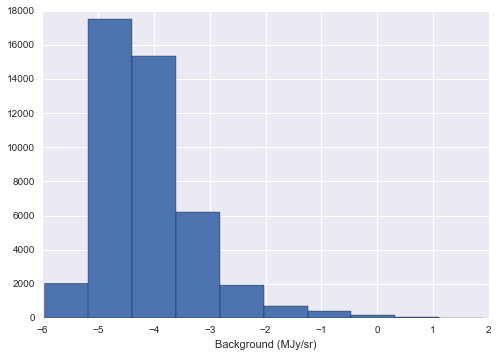

In [12]:
plt.hist(table['Bkg_SPIRE_250'])
plt.xlabel(r'Background (MJy/sr)')
plt.show()

Background is asymmetric. Mean is ~ -4.5

-------------
## Bayesian P value map
The Bayesian P value map can be thought of as a more robust residual map. They provide the probability our model would obtain the pixel data value, having inferred our model on the data. The probabilitiy value is expressed in terms of a sigma value. 

* a value of < -2 indicates that our model cannot explain why there is so little flux in the map
* a value of > -2 indicates our model cannot explain why there is so much flux in the map 
* a value of ~ 0 indicates a good fit

Plotting the distribution of the Bayesian P value map can indicate whether the map has been been fit well in general. If the distribution is centered on 0 and roughly symmetric then it is a good fit.

Suggested validation checks: 

* Check distribution is reasonable
* Check for strange areas in map

In [5]:
import aplpy
from astropy.io import fits

In [4]:
hdulist=fits.open('/Users/williamp/validation/cosmos/SPIRE/dmu26_Bayes_pval_psw_submm_20161129.fits')

/Users/williamp/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:5907: UserWarning: 2D hist input should be nsamples x nvariables;
 this looks transposed (shape is 974 x 1027)
  '(shape is %d x %d)' % inp.shape[::-1])


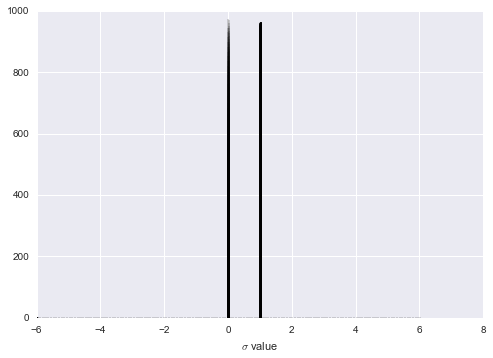

In [5]:
plt.figure()
Bayes_hist=plt.hist(np.isfinite(hdulist[1].data), bins=np.arange(-6,6.1,0.05))
plt.xlabel(r'$\sigma$ value')
plt.show()

P-values seem to cluster around 0 and 1, which many more objects at 0 than 1 (the histogram doesn't show this well). The position of objects with P-value > 0.5 are plotted below.

#Checking the positions
Using the MIPS map to check where the high flux objects and objects with highish bakground are.

In [22]:
#from astropy import wcs

In [6]:
hdulist = fits.open('/Users/williamp/dev/XID_plus/input/cosmosKs/COSMOS-Nest_image_250_SMAP_v6.0.fits')

hdulist[1].header['CTYPE1'] = 'RA'
hdulist[1].header['CTYPE2'] = 'DEC'

PACS 250 map is in greyscale, object positions are in blue, objects with fluxes > 1e5 are in red, objects with background values > -1 MJy/sr are in yellow, objects with P-values > 0.5 are in green.

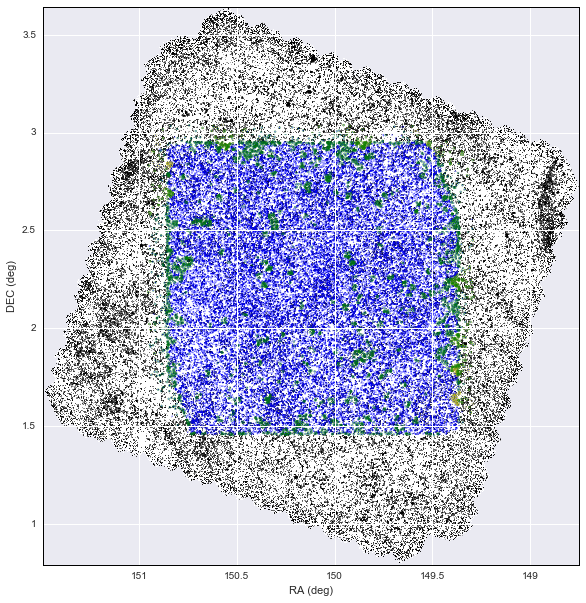

In [9]:
vmin=0.0001
vmax=0.02
fig = plt.figure(figsize=(30,10))
pltut = aplpy.FITSFigure(hdulist[1], figure=fig)

pltut.show_colorscale(vmin=vmin,vmax=vmax,cmap='Greys',stretch='log')

pltut.show_circles(table['RA'],table['Dec'], radius=0.0025, color='b')

bRA = []
bDec = []
for i in range(0, len(table)):
    if table['F_SPIRE_250'][i] > 1e5:
        bRA.append(table['RA'][i])
        bDec.append(table['Dec'][i])
if len(bRA) > 0:
    pltut.show_circles(bRA, bDec, radius=0.005, color='r')

bgRA = []
bgDec = []
for i in range(0, len(table)):
    if table['Bkg_SPIRE_250'][i] > -1:
        bgRA.append(table['RA'][i])
        bgDec.append(table['Dec'][i])
if len(bgRA) > 0:
    pltut.show_circles(bgRA, bgDec, radius=0.005, color='y')

pRA = []
pDec = []
for i in range(0, len(table)):
    if table['Pval_res_250'][i] > 0.5:
        pRA.append(table['RA'][i])
        pDec.append(table['Dec'][i])
if len(pRA) > 0:
    pltut.show_circles(pRA, pDec, radius=0.005, color='g')

plt.show()

There are no high flux value objects (red).

The high background objects (yellow) appear to be a property of individual tiles as they form squares on the image above. These tiles are on the edge of the map.

The high P-value objects (green) appear arround brighter objects (but not all bright objects) which makes sense; bright blended objects are harder to deblend than non-blended objects. They also found at the edge of the map.